In [36]:
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [3]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
X = data.iloc[:,:4]
y = data.iloc[:,-1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [18]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

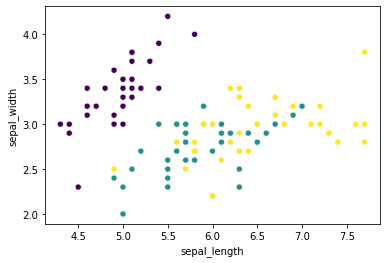

In [24]:
sns.scatterplot(X_train['sepal_length'],X_train['sepal_width'],c=y_train,legend=[1,2,3])

In [59]:
model = KMeans(n_clusters=3,max_iter=100,verbose=2).fit(X_train,y_train)

Initialization complete
Iteration 0, inertia 98.76999999999997
Iteration 1, inertia 60.70128811668724
Iteration 2, inertia 54.68743741785823
Iteration 3, inertia 53.24793693255131
Iteration 4, inertia 52.99542669397508
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 84.29999999999998
Iteration 1, inertia 55.92220491341357
Iteration 2, inertia 55.70371393026228
Iteration 3, inertia 55.526545310402355
Iteration 4, inertia 55.45188172043011
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 85.13000000000002
Iteration 1, inertia 53.30504408011241
Iteration 2, inertia 52.99542669397508
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 67.22999999999999
Iteration 1, inertia 53.12920417633577
Iteration 2, inertia 53.07380971113858
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 86.16
Iteration 1, inertia 55.56988974146889
Itera

In [60]:
y_pred =  model.predict(X_test)
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [65]:
y_test[:50]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [62]:
model.score(X_test[:10])

-6.937328749988968

In [63]:
accuracy_score(y_pred,y_test)

0.9

In [64]:
mean_absolute_error(y_pred,y_test[:])

0.1